In [1]:
import numpy as np
import sklearn
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from ucimlrepo import fetch_ucirepo 

In [2]:
car_df = fetch_ucirepo(id=19) 

X = car_df.data.features 
y = car_df.data.targets
df = pd.concat([X, y], axis=1)

In [3]:
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [4]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# LabelEncoder 객체 생성
label = LabelEncoder()

#LabelEncoder를 적용하여 변환
df['buying'] = label.fit_transform(df['buying'])
df['maint'] = label.fit_transform(df['maint'])
df['doors'] = label.fit_transform(df['doors'])
df['persons'] = label.fit_transform(df['persons'])
df['lug_boot'] = label.fit_transform(df['lug_boot'])
df['safety'] = label.fit_transform(df['safety'])
df['class'] = label.fit_transform(df['class'])
df

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


In [5]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [6]:
X=df.drop('class',axis=1)
X.head()

,buying,maint,doors,persons,lug_boot,safety
0,3,3,0,0,2,1
1,3,3,0,0,2,2
2,3,3,0,0,2,0
3,3,3,0,0,1,1
4,3,3,0,0,1,2


In [7]:
y=df['class']
y.head()

0    2
1    2
2    2
3    2
4    2
Name: class, dtype: int32

In [8]:
#원핫레코딩
Y = pd.get_dummies(df['class']).values
X = X.values

In [9]:
Y

array([[False, False,  True, False],
       [False, False,  True, False],
       [False, False,  True, False],
       ...,
       [False, False,  True, False],
       [False,  True, False, False],
       [False, False, False,  True]])

In [10]:
X

array([[3, 3, 0, 0, 2, 1],
       [3, 3, 0, 0, 2, 2],
       [3, 3, 0, 0, 2, 0],
       ...,
       [1, 1, 3, 2, 0, 1],
       [1, 1, 3, 2, 0, 2],
       [1, 1, 3, 2, 0, 0]])

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((1382, 6), (346, 6), (1382, 4), (346, 4))

In [17]:
#모델 생성

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(32,input_shape=(X_train.shape[1],),activation='relu')) #imput_shape->입력층, )
model.add(Dense(25,activation='relu'))
model.add(Dense(18,activation='relu'))
model.add(Dense(12,activation='relu'))
#model.add(Dense(15,activation='relu'))
#model.add(Dense(15,activation='relu'))
model.add(Dense(4,activation='softmax')) #다층 퍼셉트론 -> softmax / 퍼셉트론 -> sigmoid, 출력층은 class갯수가 되도록

model.compile(Adam(learning_rate=0.04),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

C:\Users\tpfzl\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 32)                  │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 25)                  │             825 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 18)                  │             468 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 12)                  │             228 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 4)                   │              52 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,797 (7.02 KB)

 Trainable params: 1,797 (7.02 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
import numpy as np
#x는 학습 데이터, y는 학습데이터 출력(타겟), epochs는 전체 학습데이터를 몇번할지, batch_size는 한번에 학습시킬 개수,validation_data는 검증시킬 데이터(모델 성능 평가)
model_history=model.fit(x=X_train, y=y_train, epochs=20, batch_size=100,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.6323 - loss: 0.9932 - val_accuracy: 0.6936 - val_loss: 0.7379
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6966 - loss: 0.7034 - val_accuracy: 0.6936 - val_loss: 0.6659
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7180 - loss: 0.6082 - val_accuracy: 0.7457 - val_loss: 0.5709
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7966 - loss: 0.4973 - val_accuracy: 0.8410 - val_loss: 0.4436
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8380 - loss: 0.3848 - val_accuracy: 0.8324 - val_loss: 0.4323
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8287 - loss: 0.3759 - val_accuracy: 0.8497 - val_loss: 0.3660
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8759 - loss: 0.3141 - val_accuracy: 0.8526 - val_loss: 0.3454
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8846 - loss: 0.2793 - val_accuracy: 0.8439 - val_loss

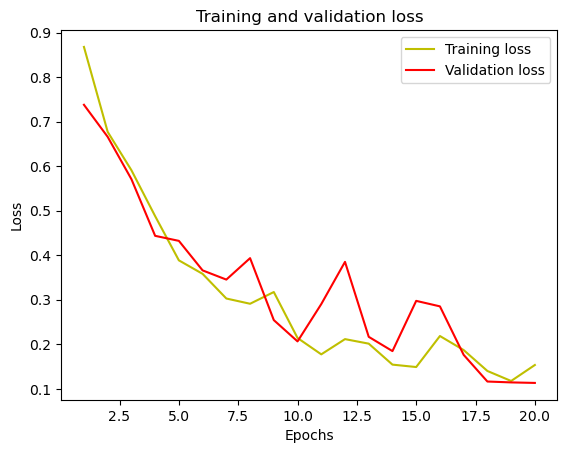

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

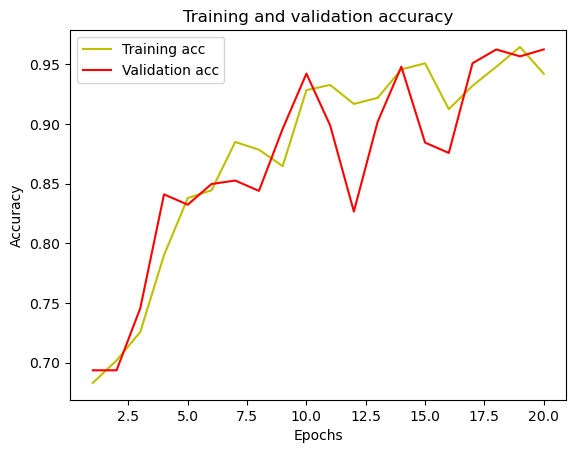

In [20]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [21]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92        79
           1       0.94      0.94      0.94        17
           2       0.98      0.98      0.98       240
           3       1.00      0.90      0.95        10

    accuracy                           0.96       346
   macro avg       0.96      0.94      0.95       346
weighted avg       0.96      0.96      0.96       346

[[ 73   1   5   0]
 [  1  16   0   0]
 [  5   0 235   0]
 [  1   0   0   9]]
